In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *

In [7]:
leaves = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # the line of code below is just using Regular Expressions to link a file to a label
    # the label, the breed of the pet, is in the filename, that's why we need a regex to extract it as the label
    get_y=parent_label,
    # now let's also add some awesome augmentation (presizing) into the mix as well
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [8]:
dls = leaves.dataloaders("./datasetsingrid")

c:\Users\ingri\anaconda3\envs\mss\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


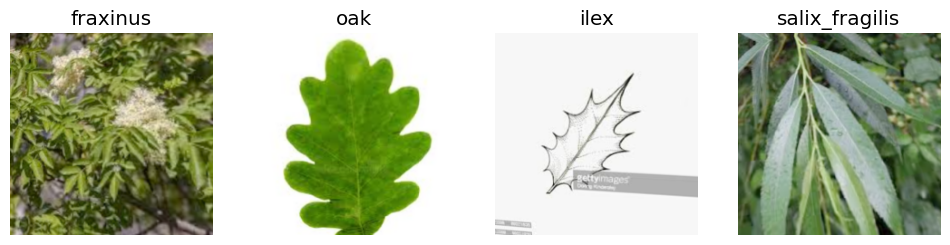

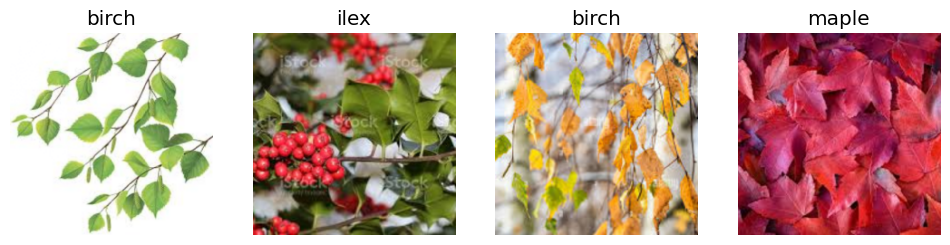

In [15]:
dls.train.show_batch(max_n=4, nrows=1)
dls.valid.show_batch(max_n=4, nrows=1)

In [20]:
from fastai.callback.fp16 import *
resnet_adv_tweaked = vision_learner(dls, resnet50, metrics=accuracy).to_fp16()
resnet_adv_tweaked.fine_tune(6, freeze_epochs=3)

c:\Users\ingri\anaconda3\envs\mss\Lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
c:\Users\ingri\anaconda3\envs\mss\Lib\site-packages\torch\cuda\amp\grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,2.719562,1.407994,0.572222,01:42
1,2.041091,0.975475,0.344444,01:41
2,1.570292,0.871212,0.277778,01:40


epoch,train_loss,valid_loss,error_rate,time
0,0.690674,0.787902,0.233333,02:10
1,0.662271,0.796510,0.272222,02:14
2,0.569329,0.882666,0.261111,02:10
3,0.498904,0.755044,0.222222,02:10
4,0.440968,0.727665,0.194444,02:13
5,0.403603,0.747174,0.211111,02:10


In [25]:
import torch
torch.cuda.is_available()

False

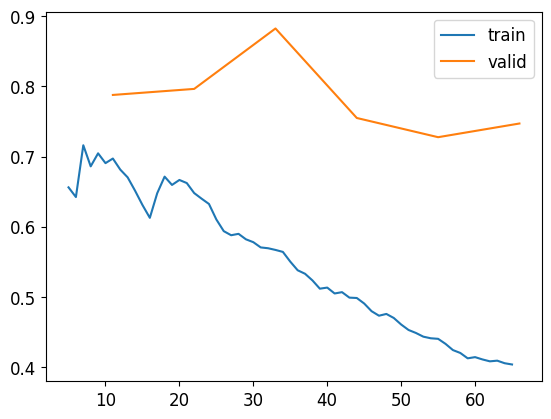

In [21]:
resnet_adv_tweaked.recorder.plot_loss()

c:\Users\ingri\anaconda3\envs\mss\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\ingri\anaconda3\envs\mss\Lib\site-packages\torch\amp\autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
c:\Users\ingri\anaconda3\envs\mss\Lib\site-packages\torch\cuda\amp\grad_scaler.py:125: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


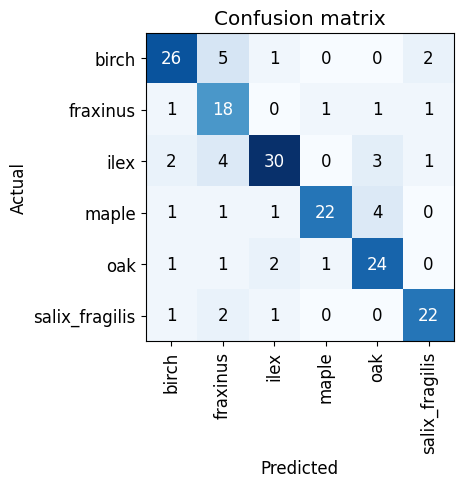

In [22]:
interp = ClassificationInterpretation.from_learner(resnet_adv_tweaked)
interp.plot_confusion_matrix()

In [24]:
# saving our model, by default in a folder called 'models'.
resnet_adv_tweaked.save('advancedtweaked_model')
#creating an serialized pickle object of our model, the export.pkl file
resnet_adv_tweaked.export()

In [36]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

In [37]:
learn.load("advancedtweaked_model")

In [38]:
error_rate = learn.validate(dl=dls.valid)[1]
print(f'Validation accuracy: {accuracy:.4f}')

c:\Users\ingri\anaconda3\envs\mss\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


Validation accuracy: 0.2111


In [39]:
accuracy = 1 - error_rate
print(accuracy)

0.7888888865709305
